In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
if device.type == "cuda":
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True

In [6]:
visbility = 0.4
colors = np.array([[1, 0, 0, visbility], [0, 1, 0, visbility], [0, 0, 1, visbility], [1, 1, 0, visbility], [1, 0, 1, visbility], [0, 1, 1, visbility], [0.5, 0, 0, visbility], [0, 0.5, 0, visbility], [0, 0, 0.5, visbility], [0.5, 0.5, 0, visbility], [0.5, 0, 0.5, visbility], [0, 0.5, 0.5, visbility], [0.5, 0.5, 0.5, visbility], [1, 0.5, 0, visbility], [1, 0, 0.5, visbility], [0.5, 1, 0, visbility], [0.5, 0, 1, visbility], [0, 1, 0.5, visbility], [0, 0.5, 1, visbility], [1, 1, 0.5, visbility], [1, 0.5, 1, visbility], [0.5, 1, 1, visbility], [1, 1, 1, visbility]], dtype=np.float32)
color_name = ['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'darkred', 'darkgreen', 'darkblue', 'darkyellow', 'darkmagenta', 'darkcyan', 'gray', 'lightred', 'lightgreen', 'lightblue', 'lightyellow', 'lightmagenta', 'lightcyan']

def show_anns(anns, borders=True):

    np.random.seed(3)
    # print(anns)
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    # sorted_anns = anns
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    num = 0
    for ann in sorted_anns:
        if num >= len(colors) or num >= len(color_name):
            num = 0
        m = ann['segmentation']
        color_mask = colors[num]
        img[m] = color_mask
        num += 1
    num = 0

    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    ax.imshow(img)

In [ ]:

def get_all_images():
    # get all the folders in the base path
    base_path = ".../test"
    folders = os.listdir(base_path)
    #filet out non folders
    folders = [os.path.join(base_path, f, "img1") for f in folders if os.path.isdir(os.path.join(base_path, f))]

    # make a images list with all the images in the folders
    images = []
    for folder in folders:
        images += [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".jpg")]
    return images

#random seed
np.random.seed(3)
#randomize the order of the images
images = get_all_images()
np.random.shuffle(images)
print(images[0])

In [ ]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

model_base_path = ""

sam2_checkpoint = model_base_path + "sam2.1_hiera_tiny.pt"
model_cfg = "/configs/sam2.1/sam2.1_hiera_t.yaml"




sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)

# mask_generator = SAM2AutomaticMaskGenerator(
#     sam2,
#     points_per_side=64,
#     pred_iou_thresh=0.8,
#     stability_score_thresh=0.91,
#     stability_score_offset=0.9,
#     box_nms_thresh=0.7,
#     min_mask_region_area=0,
#     use_m2m=False,
# )
mask_generator = SAM2AutomaticMaskGenerator(sam2)
finetuned_model_path = ""
mask_generator.predictor.model.load_state_dict(torch.load(finetuned_model_path))

<All keys matched successfully>

/SNGS-119/img1/000160.jpg
Number of predicted masks 5


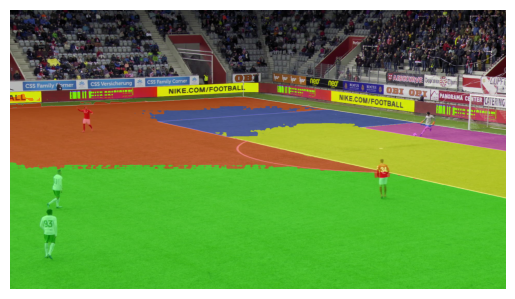

/SNGS-119/img1/000439.jpg
Number of predicted masks 2


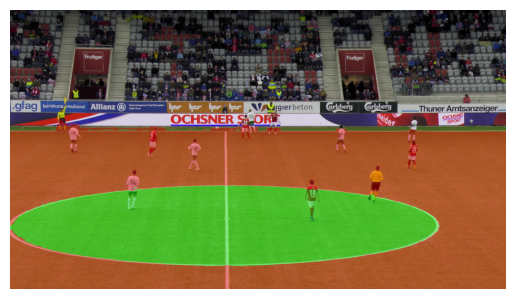

/SNGS-124/img1/000683.jpg
Number of predicted masks 3


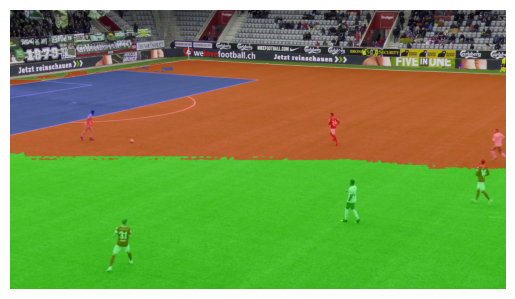

/SNGS-129/img1/000032.jpg
Number of predicted masks 5


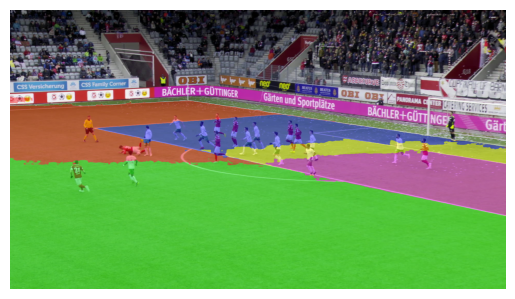

/SNGS-196/img1/000138.jpg
Number of predicted masks 2


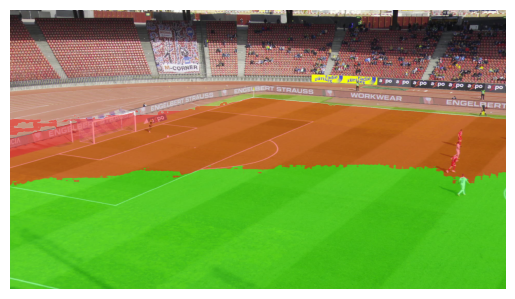

/SNGS-119/img1/000536.jpg
Number of predicted masks 2


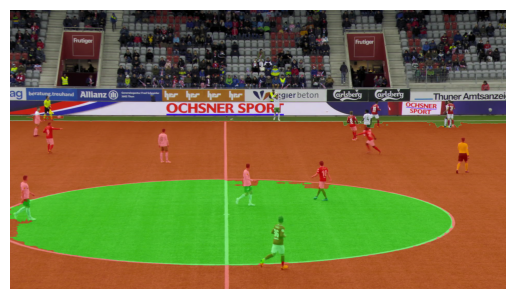

/SNGS-145/img1/000529.jpg
Number of predicted masks 3


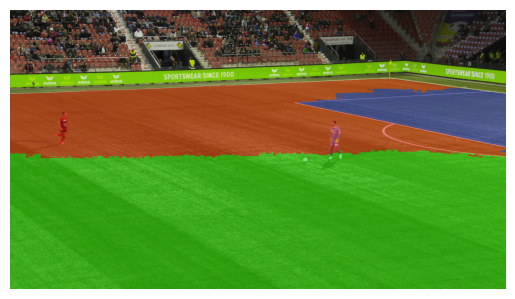

/SNGS-200/img1/000399.jpg
Number of predicted masks 3


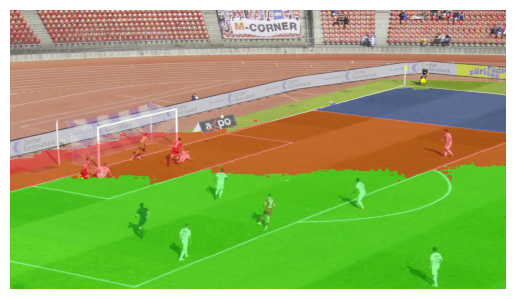

/SNGS-197/img1/000361.jpg
Number of predicted masks 5


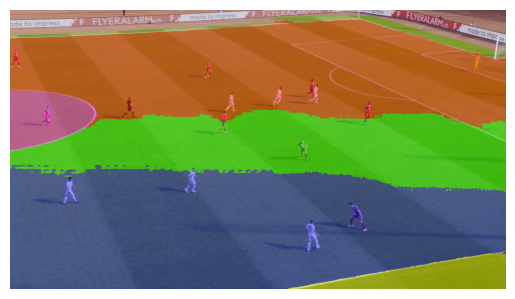

/SNGS-120/img1/000680.jpg
Number of predicted masks 3


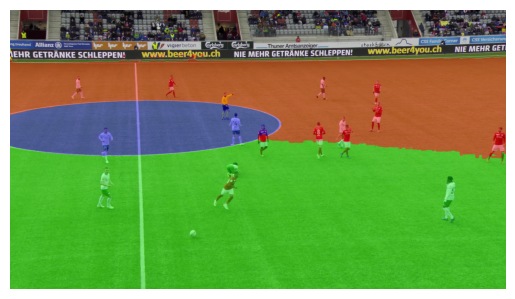

In [21]:


for img_path in images[0:10]:
    print(img_path.split("test")[-1])
    
    img = Image.open(img_path)

    img = np.array(img.convert("RGB"))
    masks = mask_generator.generate(img)

    print("Number of predicted masks", len(masks))
    # plt.figure(figsize=(20, 20))
    plt.imshow(img)
    show_anns(masks)
    plt.axis('off')
    plt.show()
    
    
